In [17]:
from astrometry.util.fits import *
import numpy as np
%matplotlib inline
np.seterr(divide='ignore');

In [18]:
T = fits_table('survey-ccds-annotated-bass.fits')
Z = fits_table('survey-ccds-annotated-mzls.fits')
G = T[T.filter == 'g']
R = T[T.filter == 'r']

In [19]:
T.about()

tabledata object with 49032 rows and 113 columns:
   airmass (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   annotated (<type 'numpy.ndarray'>) shape (49032,) dtype bool
   arawgain (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   avsky (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   badimg (<type 'numpy.ndarray'>) shape (49032,) dtype >i2
   bitmask (<type 'numpy.ndarray'>) shape (49032,) dtype uint8
   camera (<type 'numpy.ndarray'>) shape (49032,) dtype |S7
   ccd_cuts (<type 'numpy.ndarray'>) shape (49032,) dtype >i4
   ccddecoff (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   ccddecrms (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   ccdmdncol (<type 'numpy.ndarray'>) shape (49032,) dtype >f4
   ccdname (<type 'numpy.ndarray'>) shape (49032,) dtype |S4
   ccdnmatch (<type 'numpy.ndarray'>) shape (49032,) dtype >i2
   ccdnmatcha (<type 'numpy.ndarray'>) shape (49032,) dtype >i2
   ccdnmatchb (<type 'numpy.ndarray'>) shape (49032,) dtype >i2
   ccdnmatchc (<ty

In [20]:
R.psfnorm_mean

array([ 0.        ,  0.        ,  0.        , ...,  0.13980676,
        0.14868502,  0.14459223], dtype=float32)

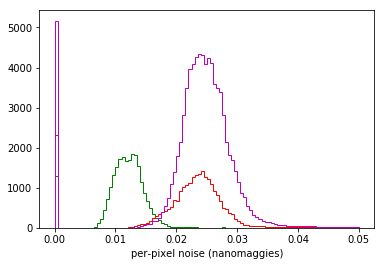

In [21]:
plt.clf()
plt.hist(G.sig1, color='g', range=(0,0.05), bins=100, histtype='step');
plt.hist(R.sig1, color='r', range=(0,0.05), bins=100, histtype='step');
plt.hist(Z.sig1, color='m', range=(0,0.05), bins=100, histtype='step');
plt.xlabel('per-pixel noise (nanomaggies)')
#plt.title('DR4 depth investigation')
plt.savefig('/tmp/sig1.png')

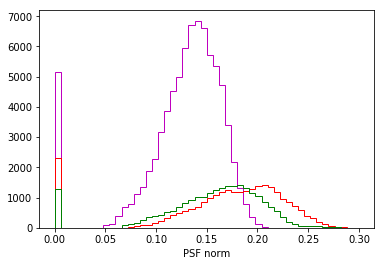

In [22]:
plt.clf()
plt.hist(Z.psfnorm_mean, color='m', bins=50, range=(0, 0.3), histtype='step');
plt.hist(R.psfnorm_mean, color='r', bins=50, range=(0, 0.3), histtype='step');
plt.hist(G.psfnorm_mean, color='g', bins=50, range=(0, 0.3), histtype='step');
plt.xlabel('PSF norm')
#plt.title('DR4 depths')
plt.savefig('/tmp/psfnorm.png')

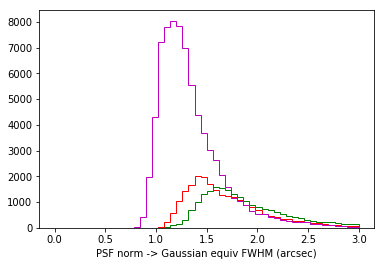

In [23]:
plt.clf()
plt.hist(2.35 * 0.454 / (2.*np.sqrt(np.pi)*G.psfnorm_mean), color='g', bins=50, range=(0, 3), histtype='step');
plt.hist(2.35 * 0.454 / (2.*np.sqrt(np.pi)*R.psfnorm_mean), color='r', bins=50, range=(0, 3), histtype='step');
plt.hist(2.35 * 0.262 / (2.*np.sqrt(np.pi)*Z.psfnorm_mean), color='m', bins=50, range=(0, 3), histtype='step');
plt.xlabel('PSF norm -> Gaussian equiv FWHM (arcsec)')
plt.savefig('/tmp/psfnorm2.png')


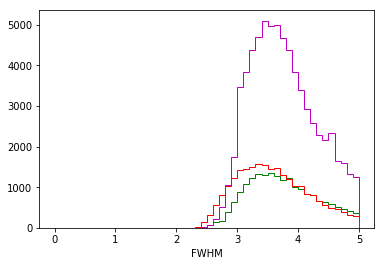

In [24]:
plt.clf()
plt.hist(G.fwhm, color='g', bins=50, range=(0, 5), histtype='step');
plt.hist(R.fwhm, color='r', bins=50, range=(0, 5), histtype='step');
plt.hist(Z.fwhm, color='m', bins=50, range=(0, 5), histtype='step');
plt.xlabel('FWHM')
plt.savefig('/tmp/fwhm.png')

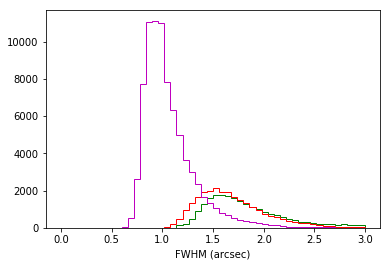

In [25]:
plt.clf()
plt.hist(0.454 * G.fwhm, color='g', bins=50, range=(0, 3), histtype='step');
plt.hist(0.454 * R.fwhm, color='r', bins=50, range=(0, 3), histtype='step');
plt.hist(0.262 * Z.fwhm, color='m', bins=50, range=(0, 3), histtype='step');
plt.xlabel('FWHM (arcsec)')
plt.savefig('/tmp/fwhm2.png')

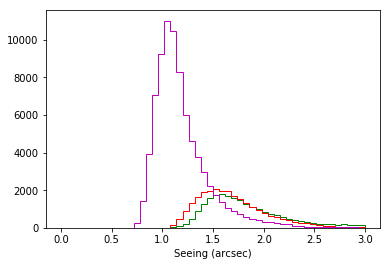

In [26]:
plt.clf()
plt.hist(G.seeing, color='g', bins=50, range=(0, 3), histtype='step');
plt.hist(R.seeing, color='r', bins=50, range=(0, 3), histtype='step');
plt.hist(Z.seeing, color='m', bins=50, range=(0, 3), histtype='step');
plt.xlabel('Seeing (arcsec)')
plt.savefig('/tmp/fwhm3.png')

The "seeing" column is good though.

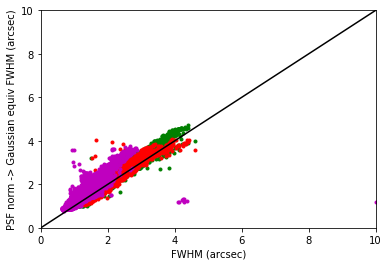

In [28]:
plt.clf()
plt.plot(0.454 * G.fwhm, 2.35 * 0.454 / (2.*np.sqrt(np.pi)*G.psfnorm_mean), 'g.')
plt.plot(0.454 * R.fwhm, 2.35 * 0.454 / (2.*np.sqrt(np.pi)*R.psfnorm_mean), 'r.')
plt.plot(0.262 * Z.fwhm, 2.35 * 0.262 / (2.*np.sqrt(np.pi)*Z.psfnorm_mean), 'm.')
plt.plot([0,10],[0,10], 'k-')
plt.xlabel('FWHM (arcsec)')
plt.ylabel('PSF norm -> Gaussian equiv FWHM (arcsec)')
plt.axis([0,10,0,10])
plt.savefig('/tmp/psfnorm3.png')

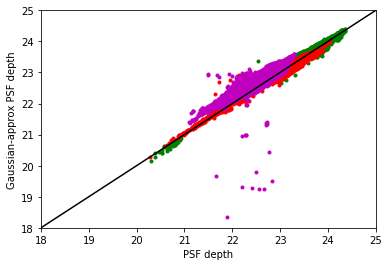

In [29]:
plt.clf()
plt.plot(G.psfdepth, G.gausspsfdepth, 'g.')
plt.plot(R.psfdepth, R.gausspsfdepth, 'r.')
plt.plot(Z.psfdepth, Z.gausspsfdepth, 'm.')
plt.plot([0,30],[0,30], 'k-')
plt.xlabel('PSF depth')
plt.ylabel('Gaussian-approx PSF depth')
plt.axis([18,25,18,25])
plt.savefig('/tmp/psfdepth.png')

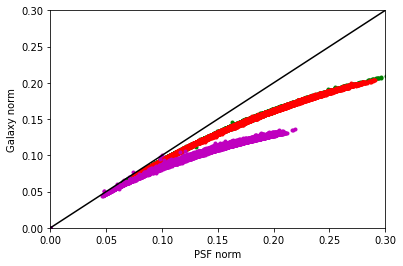

In [30]:
plt.clf()
plt.plot(G.psfnorm_mean, G.galnorm_mean, 'g.')
plt.plot(R.psfnorm_mean, R.galnorm_mean, 'r.')
plt.plot(Z.psfnorm_mean, Z.galnorm_mean, 'm.')
plt.plot([0,10],[0,10], 'k-')
plt.xlabel('PSF norm')
plt.ylabel('Galaxy norm')
plt.axis([0,0.3,0,0.3])
plt.savefig('/tmp/galnorm.png')

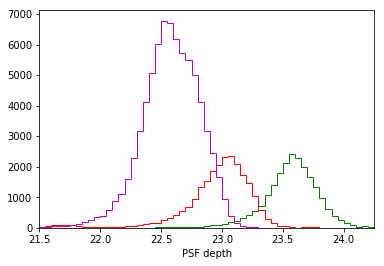

In [35]:
plt.clf()
ha = dict(histtype='step', range=(20,25), bins=100)
plt.hist(G.psfdepth, color='g', **ha)
plt.hist(R.psfdepth, color='r', **ha)
plt.hist(Z.psfdepth, color='m', **ha)
plt.xlabel('PSF depth')
plt.xlim(21.5, 24.25)
plt.savefig('/tmp/psfdepths.png')

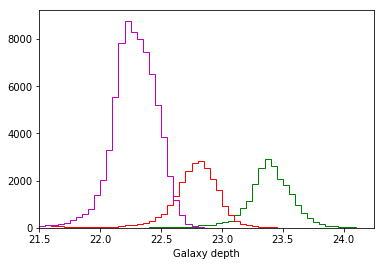

In [36]:
plt.clf()
ha = dict(histtype='step', range=(20,25), bins=100)
plt.hist(G.galdepth, color='g', **ha)
plt.hist(R.galdepth, color='r', **ha)
plt.hist(Z.galdepth, color='m', **ha)
plt.xlabel('Galaxy depth')
plt.xlim(21.5, 24.25)
plt.savefig('/tmp/galdepths.png')